Notebook Imports

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Constants

In [44]:

TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'




VOCAB_SIZE = 2500

Load the Data

In [45]:
# Features 
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
#Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [46]:
prob_token_spam

array([1.20762980e-02, 5.19363340e-03, 7.38332205e-03, ...,
       5.50173029e-06, 5.50173029e-06, 1.26539797e-04])

Calculating the Joint probabilities

The Dot Product

In [47]:
# Basic DOT product info
a = np.array([1, 2,3])
b = np.array([0,5,4])
c = np.array([[0,6,3,5],[3,0,3,6],[5,7,9,2]])
d = a.dot(b) # 1*0 + 2*5 +3*4
print('a = ',a)
print('b = ',b)
print(a.dot(c)) #Dot poduct = [1*0 + 2*3 +3*5 , 1*6 +2*0+3*1]
#print(c.dot(a))
print('shape of the dot product is ',c.shape)

a =  [1 2 3]
b =  [0 5 4]
[21 27 36 23]
shape of the dot product is  (3, 4)


In [48]:
# dot product of X test and prob_token_spam
print(X_test.shape)
print(prob_token_spam.shape)
print("shape of the dot product of " , X_test.dot(prob_token_spam).shape)
X_test.dot(prob_token_spam)


(2054, 2500)
(2500,)
shape of the dot product of  (2054,)


array([0.4314732 , 0.14674765, 0.37716562, ..., 0.09260512, 0.03347803,
       0.07206717])

Prior Probability --> P(spam) , or P(ham)

In [1]:
PROB_SPAM = 0.2609
PROB_NONSPAM = .739

Take the Log of a numpy array
Joint Probability of a posterior
log(p(token|spam)) - log(p(token)) + log(p(spam))


In [51]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens))  + np.log(PROB_SPAM)
joint_log_spam[:5]

array([27.98318596, 22.71745781, 25.36197893, 19.93475631, -5.21759425])

Calculate the log probability that emails are not spam

In [54]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)
joint_log_ham[:5]

array([-58.74462896, -36.17304569, -60.63052138, -44.87200806,
        -8.20236827])

PREDICTION 
checking for higher joint probability
P(Spam|X) > P(Ham|X) --> X belongs to Spam , and viceversa

Create a vector of Prediction , y_hat , and store the results in 'prediction'

In [58]:
prediction = joint_log_spam > joint_log_ham #y_hat
prediction[-5:]*1

array([0, 0, 0, 0, 0])

In [57]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

Simplify

In [59]:
joint_log_spam = X_test.dot(np.log(prob_token_spam))  + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

Metrix and Evaluation
Accuracy

In [76]:
correct_doc = (y_test == prediction).sum()
print('Docs classified correctly ' , correct_doc)
numdocs_wrong = X_test.shape[0] - correct_doc
print('Docs classified incorrectly ' , numdocs_wrong)
# Accuracy
accuracy = correct_doc / len(X_test)
print('accuracy is {:.2%}'.format(accuracy))
fraction_wrong = numdocs_wrong / len(X_test)
print('accuracy is {:.2%}' .format(fraction_wrong))

Docs classified correctly  2021
Docs classified incorrectly  33
accuracy is 98.39%
accuracy is 1.61%


Visualizing the results

In [81]:
#style
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop= 1, num=1000)

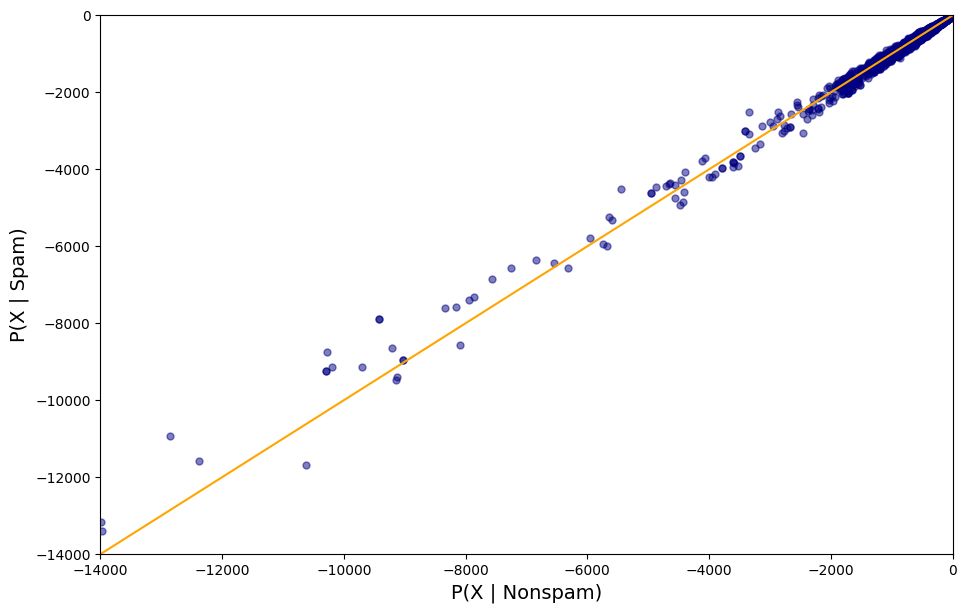

In [85]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam , color='navy' , alpha =0.5, s=25)
plt.plot(linedata,linedata , color='orange')

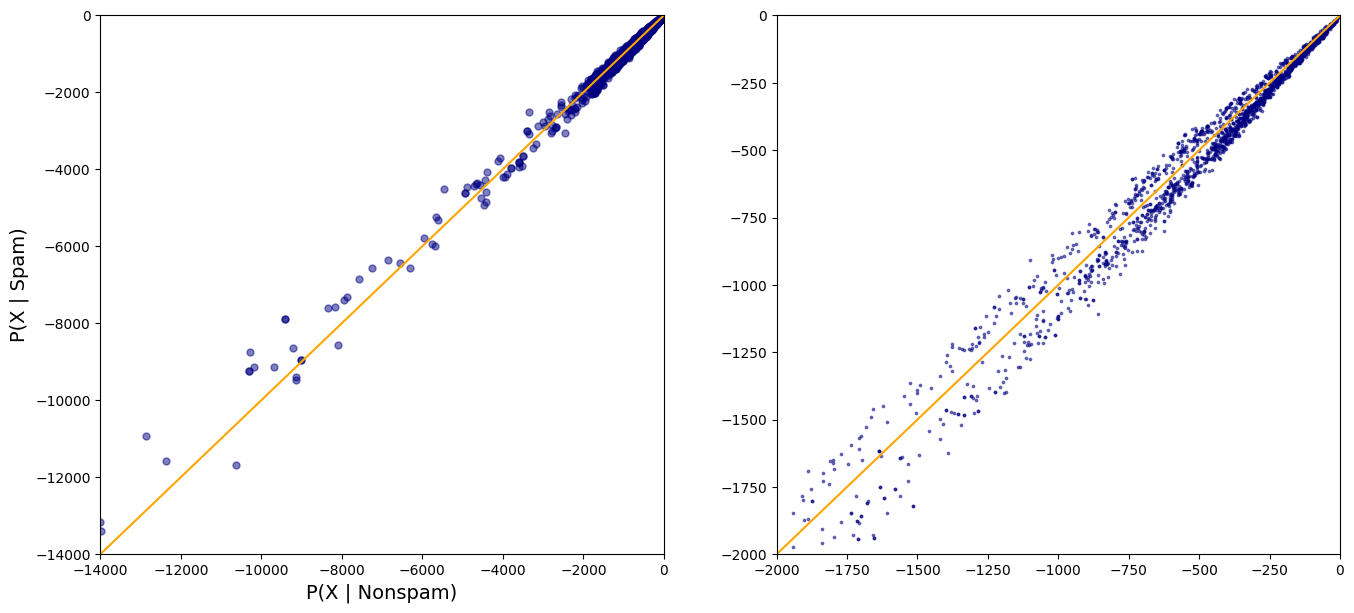

In [88]:
plt.figure(figsize=(16,7))
# chart 1
plt.subplot(1,2,1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham,joint_log_spam , color='navy' , alpha =0.5, s=25)
plt.plot(linedata,linedata , color='orange')

# chart 2
plt.subplot(1,2,2)
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham,joint_log_spam , color='navy' , alpha =0.5, s=3)
plt.plot(linedata,linedata , color='orange')

plt.show()

In [89]:
#Chart sytle
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label : joint_log_spam , xaxis_label: joint_log_ham,
                           labels : y_test})


AttributeError: module 'seaborn' has no attribute 'show'

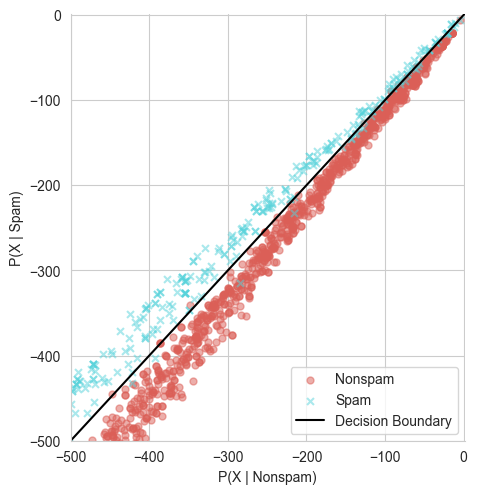

In [113]:
sns.lmplot(x=xaxis_label,  y=yaxis_label , data=summary_df, fit_reg=False ,
           scatter_kws ={'alpha':0.5 , 's':25} , hue = labels , markers =['o','x'],
           palette='hls', legend=False)
plt.xlim([-500,1])
plt.ylim([-500,1])

plt.plot(linedata,linedata,color='black')
plt.legend(( 'Nonspam','Spam','Decision Boundary'),loc='lower right' , fontsize=10)

sns.show()

False Positive and False Negative

In [114]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1476,  578], dtype=int64))

In [116]:
true_pos = (y_test == 1 ) & (prediction == 1)

In [117]:
true_pos.sum()

567

In [120]:
# False Postive
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

22

In [126]:
# Recall
recall = true_pos.sum() /  (true_pos.sum() + false_neg.sum())
precision = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print("Recal is {:.2%} " .format(recall))
print("precision is {:.2%} " .format(precision))

Recal is 96.26% 
precision is 98.10% 


In [130]:
# F1_score
f1_score = 2 *(recall * precision) / (recall + precision)
print("F score is {:.2%}".format(f1_score))

F score is 97.17%
